# Common Probability Distributions

* <h4><u>Uniform distributions</u></h4> describe random experiments where each possible outcome
has the same probability of occurring.

* <h4><u>Gaussian distributions</u></h4>
also called <b>normal distributions</b> are one of the most
important probability density functions. They are used to model the distribution
of continuous random variables. Their shape looks like a bell there is a peak of
probability that decreases when you move off.

 In the context of machine learning, Gaussian distributions are used in various
algorithms like <b>Gaussian Mixture Models (GMM) or Gaussian Processes</b>.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [2]:
# Implementation of the Gaussian function.

def gaussian(x, mu, sigma):
    # mu is mean, sigma is standard deviation, sigma**2 is variance and the distribution is a function of x.
    return (1/np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(1/(2 * sigma**2)*(x-mu)**2))

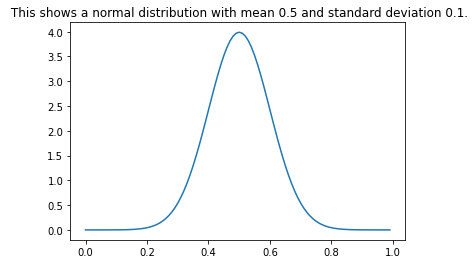

In [3]:
# Let’s plot a Gaussian function with a mean of 0.5 and a standard deviation of 0.1.
# create an array (x_axis) using np.arange() containing values that will be evaluated
# by the function (the output will be stored in y_axis).
mu, sigma = 0.5, 0.1
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis, mu, sigma)
plt.plot(x_axis, y_axis)
plt.title(" This shows a normal distribution with mean 0.5 and standard deviation 0.1.")
plt.show()

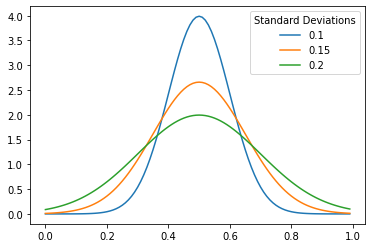

In [4]:
# Parameter: sigma (standard deviation)/ sigma**2 (variance)
# The effect of the standard deviation on the shape of the normal distribution.
# the inverse of the variance 1/variance is called the precision: a small precision
# corresponds to a wide bell shape

all_sigma = [0.1, 0.15, 0.2]
mu = 0.5
x = np.arange(0,1,0.01)
y0 = gaussian(x, mu, all_sigma[0])
y1 = gaussian(x, mu, all_sigma[1])
y2 = gaussian(x, mu, all_sigma[2])

plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(all_sigma, title="Standard Deviations")
plt.show()

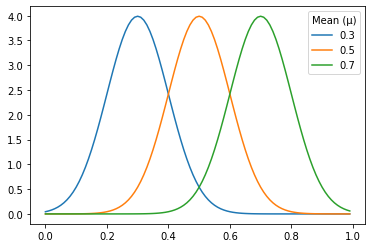

In [5]:
# Parameter: mu (mean)
# The effect of the mean μ on the position of the curve.

all_mu = [0.3, 0.5, 0.7]
sigma = 0.1
x = np.arange(0, 1, 0.01)
y_0 = gaussian(x, all_mu[0], sigma)
y_1 = gaussian(x, all_mu[1], sigma)
y_2 = gaussian(x, all_mu[2], sigma)

plt.plot(x,y_0)
plt.plot(x,y_1)
plt.plot(x,y_2)
plt.legend(all_mu, title="Mean (μ)")
plt.show()

# This shows that the mean shifts the curve without changing its shape.

# Binomial Distribution

* You can use Binomial distributions when a binary experiment is ran multiple times.
* The binomial distribution (denoted as Bin) gives the probability of getting m positive outcome over N trials.
* This is the purpose of (N/m). It is pronounced “N choose m” and it is called the <b>binomial coefficient</b>.
    It refers to the number of possible combinations, with N being the number of trials and
    m the number of positive outcomes.

In [6]:
# Implementation of Binomial Co-efficient:

def binomial_coeff(N,m):
    return np.math.factorial(N)/(np.math.factorial(N-m)*(np.math.factorial(m)))

In [7]:
# Implementation of Binomial Function:

def binomial(m, N, mu):
    return binomial_coeff(N=N, m=m) * (mu ** m) * ((1-mu)**(N-m))

In [8]:
# Problem Statement:
# Let’s consider the example of multiple coin flips: you want to know the probability of
# getting ‘heads’ twice in three coin flip.
# Probability to have two ‘heads’ and three trials, m = 2 and N = 3
# As with the Bernoulli distribution, μ is the parameter corresponding to the probability
# to get the positive outcome (in our case, ‘heads’). Let’s say that the coin is fair, so μ = 0.5

N, m, mu = 3, 2, 0.5
print(f'Probability using implementation: {binomial(m, N, mu)}')

# The implementation above is for illustration purpose but will overflow with larger values of N and m.
# Also, you can use the function binom.pmf from the scipy.stats module
print(f'Probability using scipy library: {binom.pmf(m, N, mu)}')

Probability using implementation: 0.375
Probability using scipy library: 0.375


<BarContainer object of 101 artists>

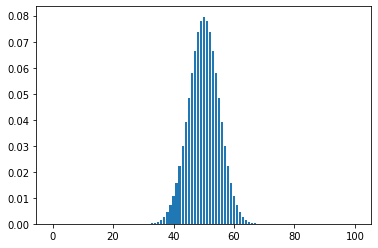

In [9]:
# Graphical Repesentation
# You can calculate the probability of getting various numbers of ‘heads’ for, say 100 trials,
# and plot the distribution

N = 100
all_binomial_probability = np.zeros(N+1)
for i in range(N+1):
    all_binomial_probability[i] = binom.pmf(i, N, 0.5)

plt.bar(np.arange(len(all_binomial_probability)),all_binomial_probability, width=0.7)

# The figure below has a large probability to get around 50 ‘heads’ (because in this example, μ = 0.5).
# This probability decreases for a smaller or larger number of ‘heads’. For instance, it is quite
# not probable to get 70 ‘heads’ over the 100 trials

# When the number of trials is large enough, the distribution looks like the normal distribution.
# This shows that the binomial distribution can be approximated by normal distributions for large N.

# Poisson Distribution
* is a discrete distribution function describing the probability that an
event will occur a certain number of times in a fixed time (or space) interval.
* used to model count-based data, like the number of emails arriving in
your mailbox in one hour or the number of customers walking into a shop in
one day, for instance.
* The distribution is a function that takes the number of occurrences of the
event as input (the integer called k in the next formula) and outputs the
corresponding probability (the probability that there are k events occurring).
* Note that both the binomial and the Poisson distributions are discrete:
they give probabilities of discrete outcomes.
